In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 38.4 MB/s eta 0:00:00


In [ ]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 74.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

ETS(Holt-Winters)

/tmp/ipython-input-1-791476984.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range(start='2023-01-01', periods=12, freq='M')


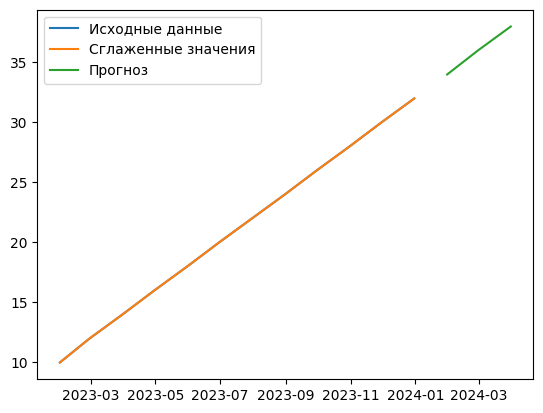

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Пример данных (ежемесячные продажи)
data = [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]
index = pd.date_range(start='2023-01-01', periods=12, freq='M')
ts = pd.Series(data, index=index)

# Тройное экспоненциальное сглаживание (Holt-Winters)
model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=4)
fit = model.fit()
forecast = fit.forecast(3)  # Прогноз на 3 периода

# Визуализация
plt.plot(ts, label='Исходные данные')
plt.plot(fit.fittedvalues, label='Сглаженные значения')
plt.plot(forecast, label='Прогноз')
plt.legend()
plt.show()

GARCH

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1264100.677315224
Iteration:      2,   Func. Count:     13,   Neg. LLF: 539.9748678281126
Iteration:      3,   Func. Count:     20,   Neg. LLF: 324.5573580083338
Iteration:      4,   Func. Count:     29,   Neg. LLF: 210.63131323126362
Iteration:      5,   Func. Count:     35,   Neg. LLF: 207.23503642167128
Iteration:      6,   Func. Count:     41,   Neg. LLF: 206.54321281227817
Iteration:      7,   Func. Count:     47,   Neg. LLF: 206.5131393134361
Iteration:      8,   Func. Count:     52,   Neg. LLF: 206.51308322188984
Iteration:      9,   Func. Count:     57,   Neg. LLF: 206.51307916793547
Iteration:     10,   Func. Count:     61,   Neg. LLF: 206.51307916823896
Optimization terminated successfully    (Exit mode 0)
            Current function value: 206.51307916793547
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results        

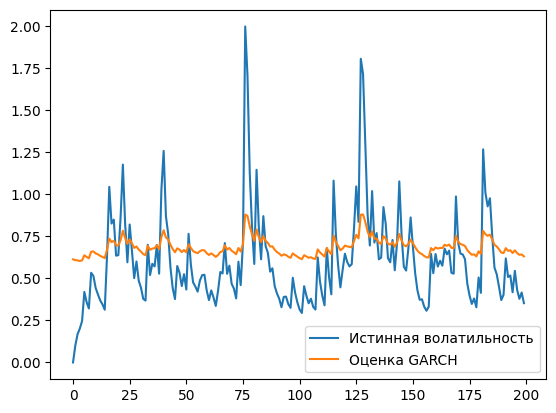

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# Генерация данных с изменяющейся волатильностью
np.random.seed(42)
n = 200
volatility = np.zeros(n)
returns = np.zeros(n)

for t in range(1, n):
    volatility[t] = 0.1 + 0.3 * returns[t-1]**2 + 0.6 * volatility[t-1]
    returns[t] = np.random.normal(0, np.sqrt(volatility[t]))

# Модель GARCH(1,1)
model = arch_model(returns, vol='GARCH', p=1, q=1)
results = model.fit()

# Вывод результатов
print(results.summary())

# Визуализация волатильности
plt.plot(volatility, label='Истинная волатильность')
plt.plot(results.conditional_volatility, label='Оценка GARCH')
plt.legend()
plt.show()

prophet

In [ ]:
from fbprophet import Prophet
import pandas as pd

# Пример данных
df = pd.DataFrame({
    'ds': pd.date_range(start='2020-01-01', periods=100),
    'y': [i + 10 * (i % 7) for i in range(100)]
})

# Модель
model = Prophet(
    growth='linear',               # Тип тренда
    yearly_seasonality=True,       # Годовая сезонность
    weekly_seasonality=True        # Недельная сезонность
)
model.fit(df)

# Прогноз
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
model.plot(forecast)

ModuleNotFoundError: No module named 'fbprophet'

arima

ADF Statistic: -1.358331765981899, p-value: 0.60208147910991


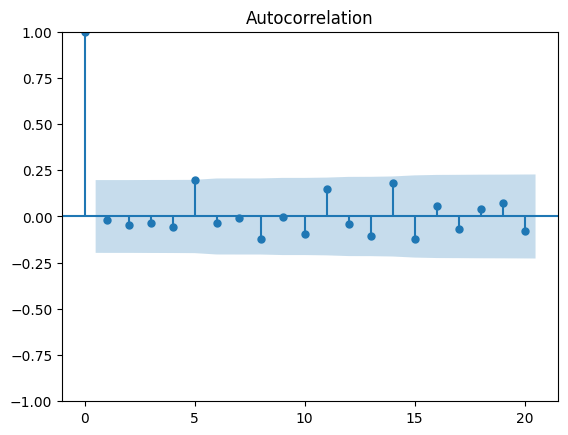

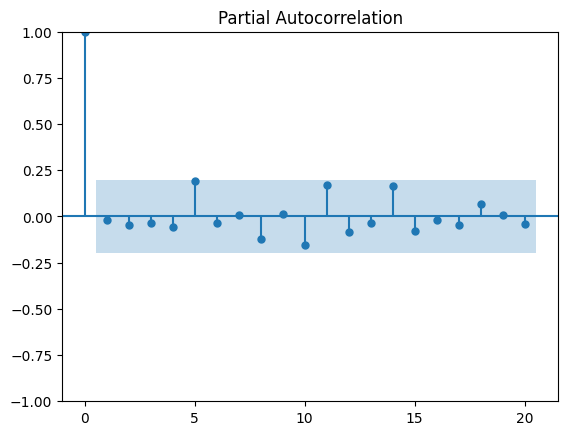

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -131.383
Date:                Sun, 20 Jul 2025   AIC                            270.767
Time:                        11:27:44   BIC                            281.147
Sample:                    01-01-2023   HQIC                           274.967
                         - 04-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1987      3.249      0.061      0.951      -6.170       6.568
ar.L2         -0.0309      0.127     -0.243      0.808      -0.281       0.219
ma.L1         -0.2060      3.216     -0.064      0.9

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Пример данных
np.random.seed(42)
data = np.cumsum(np.random.randn(100)) + 10  # Нестационарный ряд
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
ts = pd.Series(data, index=dates)

# 1. Проверка на стационарность
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print(f"ADF Statistic: {result[0]}, p-value: {result[1]}")  # p-value > 0.05 → нестационарный

# 2. Дифференцирование (d=1)
ts_diff = ts.diff().dropna()

# 3. Подбор параметров через ACF/PACF
plot_acf(ts_diff, lags=20)
plot_pacf(ts_diff, lags=20)
plt.show()  # p=2 (из PACF), q=1 (из ACF)

# 4. Обучение ARIMA(2,1,1)
model = ARIMA(ts, order=(2, 1, 1))
result = model.fit()
print(result.summary())

# 5. Прогноз
forecast = result.get_forecast(steps=10)
print(forecast.predicted_mean)

sarima

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -131.366
Date:                            Sun, 20 Jul 2025   AIC                            272.732
Time:                                    11:32:54   BIC                            285.061
Sample:                                01-01-2023   HQIC                           277.697
                                     - 04-10-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0607      0.151     -0.402      0.688      -0.357       0.235
ma.L1         -0.9300      0.085   

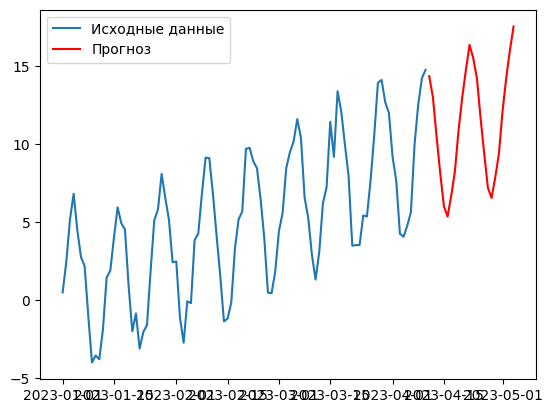

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Пример данных с сезонностью
np.random.seed(42)
trend = np.linspace(0, 10, 100)
seasonality = 5 * np.sin(2 * np.pi * np.arange(100) / 12)  # Период m=12
data = trend + seasonality + np.random.randn(100)
ts = pd.Series(data, index=dates)

# 1. Построение SARIMA(1,1,1)(1,1,1,12)
model = SARIMAX(
    ts,
    order=(1, 1, 1),            # Несезонные параметры (p, d, q)
    seasonal_order=(1, 1, 1, 12) # Сезонные параметры (P, D, Q, m)
)
result = model.fit()
print(result.summary())

# 2. Прогноз
forecast = result.get_forecast(steps=24)
forecast_mean = forecast.predicted_mean

# Визуализация
plt.plot(ts, label='Исходные данные')
plt.plot(forecast_mean, label='Прогноз', color='red')
plt.legend()
plt.show()